In [ ]:
!pip install textblob transformers
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# import pandas as pd

# df = pd.read_csv('/content/tweets dataset 2.csv')

# # Check the columns and first rows
# print(df.columns)
# df.head()

Index(['author', 'content', 'country', 'date_time', 'id', 'language',
       'latitude', 'longitude', 'number_of_likes', 'number_of_shares'],
      dtype='object')


,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.200000e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 8:38,8.190000e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 2:52,8.190000e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 2:44,8.190000e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 5:22,8.190000e+17,en,NaN,NaN,17620,4655


In [ ]:
# from transformers import pipeline

# classifier = pipeline('sentiment-analysis')

# def classify_sentiment(text):
#     result = classifier(str(text))[0]
#     return result['label']
# df_sample = df.head(1000)
# # Replace 'your_text_column' with the actual column name
# df_sample['sentiment'] = df_sample['content'].apply(classify_sentiment)

# df_sample[['content', 'sentiment']].head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
<ipython-input-7-cc20199ee4d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['sentiment'] = df_sample['content'].apply(classify_sentiment)


,content,sentiment
0,Is history repeating itself...?#DONTNORMALIZEH...,NEGATIVE
1,@barackobama Thank you for your incredible gra...,POSITIVE
2,Life goals. https://t.co/XIn1qKMKQl,POSITIVE
3,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NEGATIVE
4,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NEGATIVE


In [ ]:
# from google.colab import files

# # Save to CSV
# df_sample.to_csv('/content/sentiment_output.csv', index=False)

# # Download to your local machine
# files.download('/content/sentiment_output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<!--  -->

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import expit
import torch

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load your data
df = pd.read_csv('/content/Merged DB.csv')

# Load the toxic-bert model onto GPU (if available)
model_name = "unitary/toxic-bert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

def detect_toxicity_label(text):
    inputs = tokenizer(str(text), return_tensors="pt", truncation=True).to(device)
    with torch.no_grad():
        logits = model(**inputs).logits
    scores = expit(logits.cpu().numpy())[0]  # move back to CPU before converting
    result = {label: score for label, score in zip(labels, scores)}
    top_label = max(result, key=result.get)
    top_score = result[top_label]
    return f"{round(top_score, 3)}"

# Batching settings
batch_size = 500
num_batches = len(df) // batch_size + 1

for i in range(num_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, len(df))
    df_batch = df.iloc[start:end].copy()
    print(f"Processing batch {i+1}/{num_batches} (rows {start} to {end})")

    df_batch['sentiment'] = df_batch['tweet'].apply(detect_toxicity_label)

    # Save batch to CSV
    batch_file = f'/content/toxicity_output_batch_{i+1}.csv'
    df_batch.to_csv(batch_file, index=False)
    print(f"Saved {batch_file}")

print("All batches processed!")


Using device: cuda
Processing batch 1/374 (rows 0 to 500)
Saved /content/toxicity_output_batch_1.csv
Processing batch 2/374 (rows 500 to 1000)
Saved /content/toxicity_output_batch_2.csv
Processing batch 3/374 (rows 1000 to 1500)
Saved /content/toxicity_output_batch_3.csv
Processing batch 4/374 (rows 1500 to 2000)
Saved /content/toxicity_output_batch_4.csv
Processing batch 5/374 (rows 2000 to 2500)
Saved /content/toxicity_output_batch_5.csv
Processing batch 6/374 (rows 2500 to 3000)
Saved /content/toxicity_output_batch_6.csv
Processing batch 7/374 (rows 3000 to 3500)
Saved /content/toxicity_output_batch_7.csv
Processing batch 8/374 (rows 3500 to 4000)
Saved /content/toxicity_output_batch_8.csv
Processing batch 9/374 (rows 4000 to 4500)
Saved /content/toxicity_output_batch_9.csv
Processing batch 10/374 (rows 4500 to 5000)
Saved /content/toxicity_output_batch_10.csv
Processing batch 11/374 (rows 5000 to 5500)
Saved /content/toxicity_output_batch_11.csv
Processing batch 12/374 (rows 5500 t

In [ ]:
import pandas as pd
import glob

# Find all batch CSV files (adjust the pattern if needed)
batch_files = glob.glob('/content/toxicity_output_batch_*.csv')

# Sort the files in order (optional but helps keep them ordered)
batch_files.sort()

# Read and combine all batches
combined_df = pd.concat([pd.read_csv(f) for f in batch_files], ignore_index=True)

# Save the combined file
combined_df.to_csv('/content/toxicity_output_combined.csv', index=False)

print(f"Combined {len(batch_files)} files into 'toxicity_output_combined.csv'")


Combined 374 files into 'toxicity_output_combined.csv'


In [ ]:
import pandas as pd
import re

# Load your dataset
dataset = pd.read_csv('/content/dataset.csv')

# Clean and count words (excluding links that start with http)
def count_words_excluding_links(text):
    words = str(text).split()
    filtered_words = [word for word in words if not word.lower().startswith("http")]
    return len(filtered_words)

dataset['tweet_length'] = dataset['tweet'].apply(count_words_excluding_links)

# Count hashtags
dataset['hashtag_count'] = dataset['tweet'].astype(str).apply(lambda x: len(re.findall(r'#\w+', x)))

# Preview
print(dataset[['tweet', 'tweet_length', 'hashtag_count']].head())

# Save and download
dataset.to_csv('/content/dataset_cleaned.csv', index=False)

from google.colab import files
files.download('/content/dataset_cleaned.csv')


                                               tweet  tweet_length  \
0  Is history repeating itself...?#DONTNORMALIZEH...             4   
1  @barackobama Thank you for your incredible gra...            14   
2                Life goals. https://t.co/XIn1qKMKQl             2   
3            Me right now 🙏🏻 https://t.co/gW55C1wrwd             4   
4  SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...             7   

   hashtag_count  
0              1  
1              0  
2              0  
3              0  
4              0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ✅ Install XGBoost (Colab usually has it)
!pip install -q xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# ✅ 1. Load dataset
df = pd.read_csv('/content/dataset_cleaned.csv')

# ✅ 2. Feature engineering
df['log_followers'] = np.log1p(df['followers_count'])

# ✅ 3. Select features & drop rows with NaN/infinity
features = ['log_followers', 'sentiment', 'tweet_length', 'hashtag_count', 'number_of_shares']
df = df[features + ['number_of_likes']].dropna()
df = df[np.isfinite(df['number_of_likes'])]

# ✅ 4. Define X and y
X = df[features]
y = df['number_of_likes']

# ✅ 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ 6. Define XGBoost with GPU enabled
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',  # Replaces deprecated 'gpu_hist'
    device='cuda',       # Uses GPU properly
    random_state=42
)

# ✅ 7. Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# ✅ 8. Hyperparameter tuning with cross-validation
search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='neg_root_mean_squared_error',
    n_iter=15,
    cv=3,
    verbose=2,
    n_jobs=1,  # Must be 1 when using GPU
    random_state=42
)

# ✅ 9. Train
search.fit(X_train, y_train)

# ✅ 10. Evaluate best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Older sklearn fix
mae = mean_absolute_error(y_test, y_pred)

print("✅ Best Hyperparameters:", search.best_params_)
print(f"✅ Test RMSE: {rmse:.2f}")
print(f"✅ Test MAE: {mae:.2f}")


<ipython-input-5-7bea62c4e529>:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dataset_cleaned.csv')


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsa

In [ ]:
!pip install -q xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# ✅ Load dataset
df = pd.read_csv('/content/dataset_cleaned.csv')

# ✅ Add log_followers
df['log_followers'] = np.log1p(df['followers_count'])

# ✅ Split into two groups
high_popularity = df[df['followers_count'] > 10000].copy()
low_popularity = df[df['followers_count'] <= 10000].copy()

# ✅ Modeling function
def run_xgboost_on_group(group_df, label):
    print(f"\n🚀 Running XGBoost for {label} group")

    features = ['log_followers', 'sentiment', 'tweet_length', 'hashtag_count', 'number_of_shares']
    group_df = group_df[features + ['number_of_likes']].dropna()
    group_df = group_df[np.isfinite(group_df['number_of_likes'])]

    X = group_df[features]
    y = group_df['number_of_likes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',  # ✅ use CPU-compatible histogram algorithm
        device='cuda',       # ✅ GPU usage
        random_state=42
    )

    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.7, 1.0],
        'colsample_bytree': [0.7, 1.0]
    }

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring='neg_root_mean_squared_error',
        n_iter=10,
        cv=3,
        verbose=2,
        n_jobs=1,
        random_state=42
    )

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print("✅ Best Hyperparameters:", search.best_params_)
    print(f"✅ {label} RMSE: {rmse:.2f}")
    print(f"✅ {label} MAE: {mae:.2f}")

# ✅ Run on both groups
run_xgboost_on_group(high_popularity, "High Popularity")
run_xgboost_on_group(low_popularity, "Low Popularity")


<ipython-input-6-5823a7d3e1ee>:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dataset_cleaned.csv')



🚀 Running XGBoost for High Popularity group
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, sub

In [ ]:
!pip install -q xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# ✅ Load dataset
df = pd.read_csv('/content/dataset_cleaned.csv')

# ✅ Add log_followers
df['log_followers'] = np.log1p(df['followers_count'])

# ✅ Define follower intervals
bins = [0, 1e4, 1e5, 1e6, 1e7, np.inf]
labels = ['0-10K', '10K-100K', '100K-1M', '1M-10M', '10M+']
df['popularity_bin'] = pd.cut(df['followers_count'], bins=bins, labels=labels, right=False)

# ✅ Modeling function
def run_xgboost_on_group(group_df, label):
    print(f"\n🚀 Running XGBoost for {label} group")

    features = ['log_followers', 'sentiment', 'tweet_length', 'hashtag_count', 'number_of_shares']
    group_df = group_df[features + ['number_of_likes']].dropna()
    group_df = group_df[np.isfinite(group_df['number_of_likes'])]

    if len(group_df) < 100:
        print(f"⚠️ Skipping '{label}' — not enough data ({len(group_df)} rows)")
        return

    X = group_df[features]
    y = group_df['number_of_likes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',  # ✅ New recommended method
        device='cuda',       # ✅ GPU usage
        random_state=42
    )

    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.7, 1.0],
        'colsample_bytree': [0.7, 1.0]
    }

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring='neg_root_mean_squared_error',
        n_iter=10,
        cv=3,
        verbose=2,
        n_jobs=1,
        random_state=42
    )

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print("✅ Best Hyperparameters:", search.best_params_)
    print(f"✅ {label} RMSE: {rmse:.2f}")
    print(f"✅ {label} MAE: {mae:.2f}")

# ✅ Loop through all bins
for label in labels:
    bin_df = df[df['popularity_bin'] == label].copy()
    run_xgboost_on_group(bin_df, label)


<ipython-input-7-cf6da5e02de2>:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dataset_cleaned.csv')



🚀 Running XGBoost for 0-10K group
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7

In [ ]:
import pandas as pd
import numpy as np

# ✅ Load your dataset
df = pd.read_csv('/content/dataset_cleaned.csv')

# ✅ Define the bins and corresponding labels
bins = [0, 1e4, 1e5, 1e6, 1e7, np.inf]
labels = ['0-10K', '10K-100K', '100K-1M', '1M-10M', '10M+']

# ✅ Create a new column to categorize follower count into bins
df['popularity_bin'] = pd.cut(df['followers_count'], bins=bins, labels=labels, right=False)

# ✅ Drop rows with missing values in the relevant columns
df = df[['popularity_bin', 'number_of_likes']].dropna()

# ✅ Calculate and display the average number of likes for each bin
avg_likes = df.groupby('popularity_bin')['number_of_likes'].mean().round(2)

print("📊 Average Likes per Follower Group:")
print(avg_likes)


📊 Average Likes per Follower Group:
popularity_bin
0-10K          2.85
10K-100K     197.82
100K-1M      790.57
1M-10M      3846.57
10M+        9990.65
Name: number_of_likes, dtype: float64


<ipython-input-8-3bd9afc743fc>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dataset_cleaned.csv')
<ipython-input-8-3bd9afc743fc>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_likes = df.groupby('popularity_bin')['number_of_likes'].mean().round(2)


<ipython-input-7-867c5bde3b8f>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dataset_cleaned.csv')


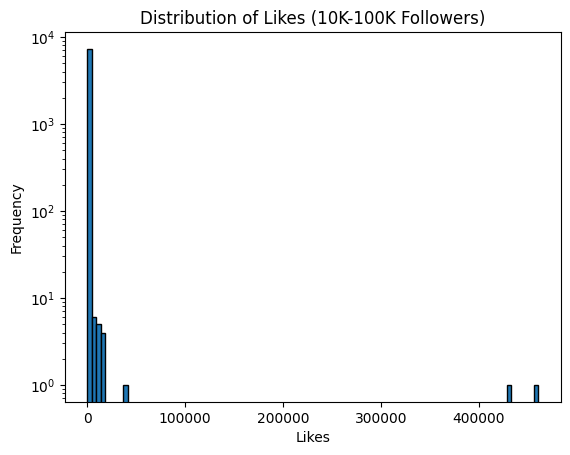

In [ ]:
import pandas as pd
import numpy as np
# ✅ Load dataset
df = pd.read_csv('/content/dataset_cleaned.csv')
import matplotlib.pyplot as plt

interval_df = df[(df['followers_count'] > 10_000) & (df['followers_count'] <= 100_000)]
plt.hist(interval_df['number_of_likes'], bins=100, edgecolor='black')
plt.title("Distribution of Likes (10K-100K Followers)")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.yscale('log')  # if there's a long tail
plt.show()

In [ ]:
!pip install -q xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# ✅ Load dataset
df = pd.read_csv('/content/dataset_cleaned.csv')

# ✅ Add log_followers
df['log_followers'] = np.log1p(df['followers_count'])

# ✅ Define follower intervals
bins = [0, 1e4, 1e5, 1e6, 1e7, np.inf]
labels = ['0-10K', '10K-100K', '100K-1M', '1M-10M', '10M+']
df['popularity_bin'] = pd.cut(df['followers_count'], bins=bins, labels=labels, right=False)

# ✅ Filter for 10K–100K group
group_df = df[df['popularity_bin'] == '10K-100K'].copy()

# ✅ Drop rows with missing values in features/target
features = ['log_followers', 'sentiment', 'tweet_length', 'hashtag_count', 'number_of_shares']
group_df = group_df[features + ['number_of_likes']].dropna()
group_df = group_df[np.isfinite(group_df['number_of_likes'])]
print(f"✅ before removing outliers: {len(group_df)} rows")
# ✅ Remove outliers using IQR method
Q1 = group_df['number_of_likes'].quantile(0.25)
Q3 = group_df['number_of_likes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
group_df = group_df[(group_df['number_of_likes'] >= lower_bound) & (group_df['number_of_likes'] <= upper_bound)]
print(f"✅ After removing outliers: {len(group_df)} rows")

# ✅ Split into features and target
X = group_df[features]
y = group_df['number_of_likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Define and train model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',  # new standard with GPU support
    device='cuda',
    random_state=42
)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='neg_root_mean_squared_error',
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)

# ✅ Fit and evaluate
search.fit(X_train, y_train)
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("✅ Best Hyperparameters:", search.best_params_)
print(f"✅ 10K–100K (cleaned) RMSE: {rmse:.2f}")
print(f"✅ 10K–100K (cleaned) MAE: {mae:.2f}")


<ipython-input-10-4a290490a900>:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dataset_cleaned.csv')


✅ before removing outliers: 7308 rows
✅ After removing outliers: 6186 rows
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_